# PART3 パラメータをチューニングしてみよう

## おまじない

In [134]:
!pip install category_encoders

In [135]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV

## データの読み込み
- train.csvとtest.csvとsubmit_sample.csvの３つのファイルを読み込みましょう
- それぞれを読み込んだものは変数はtrain, test, sampleに代入しましょう

In [136]:
train = pd.read_csv('train.csv', index_col=0)
test = pd.read_csv('test.csv', index_col=0)
sample = pd.read_csv('submit_sample.csv', header=None)

## trainから説明変数となるデータを取り出しましょう
- iloc[]を使います
- y以外を説明変数として取り出し、変数trainXに代入しましょう

In [137]:
trainX = train.iloc[:, 0:-1]
trainX

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
id,,,,,,,,,,,,,,,,
0,31,services,married,secondary,no,12294,yes,no,cellular,21,nov,101,3,498,0,other
1,29,entrepreneur,single,tertiary,no,43027,no,no,cellular,22,aug,158,2,702,0,unknown
2,35,management,married,tertiary,no,12252,yes,no,cellular,11,nov,351,1,826,0,failure
3,31,technician,married,secondary,no,99121,yes,yes,unknown,16,may,658,2,120,0,failure
4,48,unemployed,married,primary,no,42005,yes,no,telephone,3,apr,177,1,273,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27095,37,blue-collar,married,secondary,no,26661,yes,no,cellular,27,may,345,4,425,0,unknown
27096,35,services,married,secondary,no,42150,yes,no,cellular,27,may,121,1,719,0,unknown
27097,35,services,married,unknown,no,34531,no,no,cellular,28,jun,177,2,121,0,unknown


In [138]:
trainX.describe()

,age,balance,day,duration,campaign,pdays,previous
count,27100.000000,27100.000000,27100.000000,27100.000000,27100.000000,27100.000000,27100.000000
mean,36.073284,47682.901771,16.747565,229.325387,1.775830,432.482399,0.085720
std,7.816417,31650.760036,8.569588,204.939958,0.950045,252.150648,0.365889
min,22.000000,-6847.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,31.000000,20015.750000,8.000000,121.000000,1.000000,214.000000,0.000000
50%,33.000000,47624.000000,17.000000,158.000000,1.000000,432.000000,0.000000
75%,37.000000,75330.000000,26.000000,345.000000,2.000000,650.000000,0.000000
max,90.000000,102121.000000,31.000000,3076.000000,5.000000,870.000000,3.000000


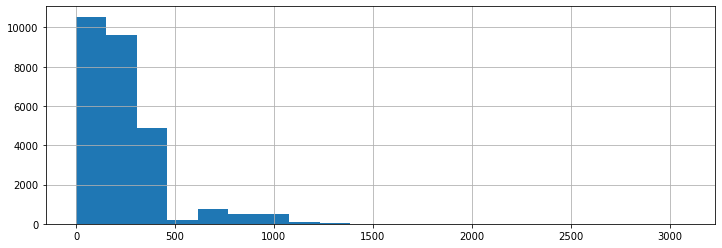

In [154]:
plt.figure(figsize=(12, 4))
trainX['duration'].hist(bins=20)

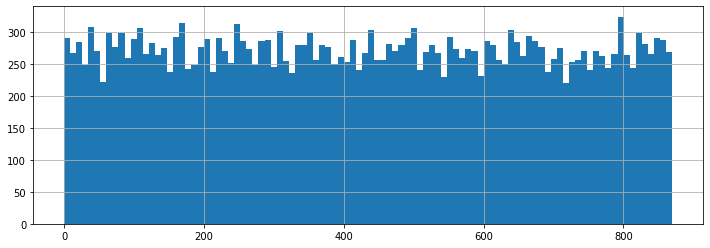

In [156]:
plt.figure(figsize=(12, 4))
trainX['pdays'].hist(bins=100)

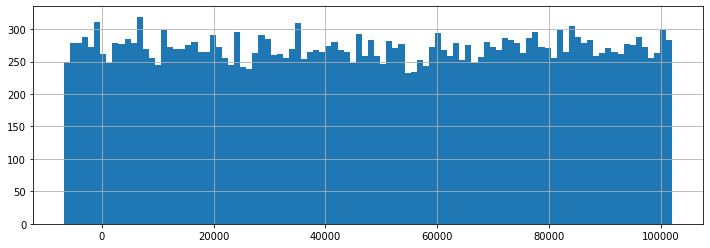

In [157]:
plt.figure(figsize=(12, 4))
trainX['balance'].hist(bins=100)

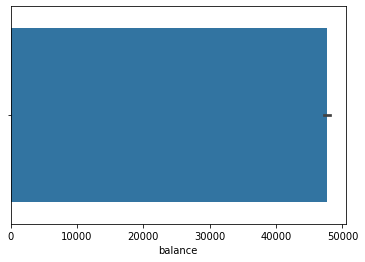

In [163]:
import seaborn as sns

sns.barplot(data=train, x='balance', hue='y')

## trainから目的変数となるデータを取り出しましょう
- yを選択し、変数yに代入しましょう

In [142]:
y = train['y']

## testから説明変数となるデータを取り出しましょう
- testの全てのカラムが説明変数となりますので、copy関数を使って変数testXに代入します

In [143]:
testX = test.copy()

In [144]:
trainX['age_bining'] = pd.cut(trainX['age'], [0,20,30,40,50,60,100])
testX['age_bining'] = pd.cut(testX['age'], [0,20,30,40,50,60,100])


## trainXとtestXをダミー変数化しましょう

In [145]:
cols_i = trainX.select_dtypes(exclude='object').columns.tolist()

In [146]:
cols_o = testX.select_dtypes(include='object').columns.tolist()
# cols_o.append('age_bining')

In [147]:
cols_o

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [148]:
# trainX = pd.get_dummies(trainX)
# testX = pd.get_dummies(testX)

In [149]:
pd.concat([trainX[cols_o], testX[cols_o]], axis=0).isnull().any()

job          False
marital      False
education    False
default      False
housing      False
loan         False
contact      False
month        False
poutcome     False
dtype: bool

In [150]:
import category_encoders as ce
ce_ohe = ce.OneHotEncoder(handle_unknown='impute')
ce_ohe.fit(pd.concat([trainX[cols_o], testX[cols_o]], axis=0))

OneHotEncoder(cols=['job', 'marital', 'education', 'default', 'housing', 'loan',
                    'contact', 'month', 'poutcome'],
              drop_invariant=False, handle_missing='value',
              handle_unknown='impute', return_df=True, use_cat_names=False,
              verbose=0)

In [ ]:
pd.concat([trainX[cols_o], testX[cols_o]], axis=0)

In [111]:

trainX_ = ce_ohe.transform(trainX[cols_o])
testX_ = ce_ohe.transform(testX[cols_o])

TypeError: 'IntervalArray.fillna' only supports filling with a scalar 'pandas.Interval'. Got a 'float' instead.

In [17]:
trainX_.shape

(27100, 43)

In [18]:
trainX_

,job_1,job_2,job_3,job_4,job_5,job_6,job_7,job_8,job_9,job_10,...,month_6,month_7,month_8,month_9,month_10,month_11,poutcome_1,poutcome_2,poutcome_3,poutcome_4
id,,,,,,,,,,,,,,,,,,,,,
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27095,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
27096,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
27097,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [58]:
cols_i

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

In [19]:
trainX = pd.concat([trainX[cols_i], trainX_], axis=1)
testX = pd.concat([testX[cols_i], testX_], axis=1)


## 決定木モデルの箱を用意しましょう
- 変数名をclf1とし、DT()を代入しましょう
- パラメータは一旦、max_depth=2, min_samples_leaf=500としましょう

In [20]:
clf1 = DT(max_depth=2, min_samples_leaf=500)

## クロスバリデーションをしてclf1の精度を確かめてみましょう
- cross_validate関数を使います
- オプションには、clf1, trainX, y, cv=5, scoring="roc_auc",n_jobs=-1と書きます

In [21]:
cross_validate(clf1, trainX, y, cv=5, scoring="roc_auc", n_jobs=-1, return_train_score=True)

{'fit_time': array([0.0708096 , 0.06183314, 0.0747993 , 0.05983949, 0.05086637]),
 'score_time': array([0.00498557, 0.00498772, 0.00698066, 0.00598431, 0.00598598]),
 'test_score': array([0.69029389, 0.67619773, 0.69763379, 0.69029574, 0.68916622]),
 'train_score': array([0.68456481, 0.69445926, 0.68915697, 0.68453695, 0.68482895])}

## 異なるパラメータでもう一度決定木の箱を準備しましょう
- 変数はclf2としましょう
- パラメータはmax_depth=10, min_samples_leaf=500としましょう

In [22]:
clf2 = DT(max_depth=10, min_samples_leaf=500)

## クロスバリデーションをしてclf2の精度を確かめてみましょう

In [23]:
cross_validate(clf2, trainX, y, cv=5, scoring="roc_auc", n_jobs=-1, return_train_score=True)

{'fit_time': array([0.11369944, 0.11671066, 0.1117022 , 0.13962293, 0.16355777]),
 'score_time': array([0.00498486, 0.00694752, 0.00501275, 0.00498748, 0.00598359]),
 'test_score': array([0.7755038 , 0.76613773, 0.76742142, 0.77677481, 0.78473278]),
 'train_score': array([0.79333291, 0.78978784, 0.78475115, 0.79022598, 0.78797022])}

## 新たな決定木モデルの箱を準備しましょう
- 変数clf3とし、今回は特にパラメータはセットしません

In [24]:
clf3 = DT()

## グリッドサーチを試してみましょう
- パラメータの範囲を指定し、その範囲をしらみつぶしに調べることで、最適なパラメータを探索することをグリッドサーチといいます
- グリッドサーチ＋クロスバリデーションの組み合わせは良くパラメータ探索の方法として利用されます
- まず探索するパラメータの範囲を表す変数parametersを作ります
- この変数を作る時、"カギ"括弧ではなく、"波"括弧であることに注意して下さい
- {"パラメータの名前①":[範囲], "パラメータの名前②":[範囲]...}のように書きます
- 今回はmax_depthを2から10まで探索してみます

In [25]:
parameters = {"max_depth":[2,3,4,5,6,7,8,9,10]}

In [26]:
parameters = {"max_depth": list(range(2,11))}

In [27]:
parameters

{'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]}

## グリッドサーチ+クロスバリデーションで最適なパラメータを探してみましょう

- GridSearchCV関数を使います
- オプションとして、clf3, parameters, cv=5, scoring="roc_auc",n_jobs=-1と書きます
- グリッドサーチの結果は、変数gcvに代入しましょう
- その後、fit関数を使って、探索をしましょう

In [28]:
gcv = GridSearchCV(clf3, parameters, cv=5, scoring="roc_auc", n_jobs=-1, return_train_score=True)
gcv.fit(trainX, y)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
           

## グリッドサーチの結果を見てみましょう
- cv_____results_で結果を見る事が出来ます

In [29]:
gcv.cv_results_

{'mean_fit_time': array([0.1027245 , 0.11050487, 0.14501166, 0.13723321, 0.1505971 ,
        0.16775122, 0.19308395, 0.22021079, 0.22220774]),
 'std_fit_time': array([0.0244952 , 0.01039087, 0.01517328, 0.02243121, 0.00560616,
        0.01360775, 0.00606957, 0.01322212, 0.01851256]),
 'mean_score_time': array([0.00857735, 0.00897627, 0.00777926, 0.01037164, 0.00638251,
        0.01057215, 0.00757942, 0.00718064, 0.00598216]),
 'std_score_time': array([0.0023259 , 0.00209042, 0.00116351, 0.00425944, 0.00079784,
        0.00411753, 0.0004885 , 0.00074656, 0.00089005]),
 'param_max_depth': masked_array(data=[2, 3, 4, 5, 6, 7, 8, 9, 10],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 2},
  {'max_depth': 3},
  {'max_depth': 4},
  {'max_depth': 5},
  {'max_depth': 6},
  {'max_depth': 7},
  {'max_depth': 8},
  {'max_depth': 9},
  {'max_depth': 10}],
 'split0_t

## cv_____results_の中で重要な２つをみてみましょう
- cv_____results_["mean_train_score"]とcv_____results_["mean_test_score"]です
- それぞれ変数train_scoreとtest_scoreに代入しましょう

In [30]:
train_score = gcv.cv_results_['mean_train_score']
test_score = gcv.cv_results_['mean_test_score']

In [31]:
train_score

array([0.6985002 , 0.72383032, 0.74763903, 0.76940834, 0.78756838,
       0.8041401 , 0.81866293, 0.83467093, 0.85083185])

## train_scoreとtest_scoreを可視化しましょう
- x軸をmax_depth、y軸をaucとしてグラフを描きます
- 何も設定しないとx軸は0からスタートとなり、実際の値とずれてしまうので、調整が必要です
- 調整をする為には、plt.xticks([0,1],[2,3])のように書きます
- 上記のオプションの意味は何もしない時に0のものを2とし、1のものを3とする、という意味になります
- 今回はmax_depthを2～10まで調べたので9点あります

([<matplotlib.axis.XTick at 0x22346ec99c8>,
 <a list of 9 Text xticklabel objects>)

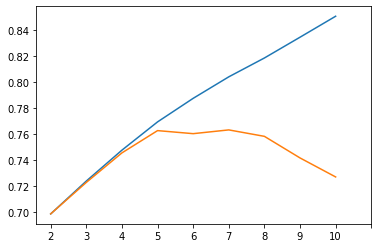

In [32]:
plt.plot(train_score)
plt.plot(test_score)
plt.xticks(list(range(0, 10)), list(range(2, 11)))

## グリッドサーチで選ばれたパラメータを確認しましょう
- best_____params_で結果を見ることができます

In [33]:
gcv.best_params_

{'max_depth': 7}

## testの予測しましょう
- gcvもpredict_proba関数を持っており、自動的に最適なパラメータを使ったモデルで予測がされます
- 予測結果はpredに代入しましょう。その後、1の確率のみを取り出して、再びpredに代入しましょう

In [34]:
testX

,age,balance,day,duration,campaign,pdays,previous,job_1,job_2,job_3,...,month_6,month_7,month_8,month_9,month_10,month_11,poutcome_1,poutcome_2,poutcome_3,poutcome_4
id,,,,,,,,,,,,,,,,,,,,,
0,35,89043,7,101,2,184,2,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,37,64372,7,158,3,241,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
2,31,31606,15,152,2,47,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,31,94826,27,345,2,490,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,32,100401,7,126,1,686,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18045,49,98357,6,101,2,417,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
18046,34,29621,12,345,1,815,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
18047,34,94260,16,121,2,370,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [35]:
pred = gcv.predict_proba(testX)

In [36]:
pred = pred[:,1]

## predをsample[1]に代入してファイル出力し、DeepAnalyticsへ投稿しましょう
- ファイル名は「submit3_bank.csv」としましょう
- index=None,header=Noneのオプションを忘れないように書きだしましょう

In [37]:
sample[1] = pred
sample.to_csv('submit3_bank.csv', index=None, header=None)

# 実習

1.新たな決定木モデルの箱を変数clf4として準備してみよう。パラメータの設定は不要です

In [38]:
clf4 = DT()

2.max_depthとmin_samples_leafの値の範囲を指定した変数parameters2を作ろう
- max_depthは2～10まで、min_samples_leafは[5,10,20,50,100,500]にしましょう

In [39]:
parameters2 = {
    "max_depth": list(range(2,11)),
    "min_samples_leaf": [5,10,20,50,100,500],
    "random_state": [0]
}

3.グリッドサーチ+クロスバリデーションで最適なパラメータを探そう。グリッドサーチの結果は変数gcv2に代入しよう

In [40]:
gcv2 = GridSearchCV(clf4, parameters2, cv=5, scoring="roc_auc", n_jobs=-1, return_train_score=True)
gcv2.fit(trainX, y)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
            

4.最適なパラメータはなんだったか確かめてみよう

In [41]:
gcv2.best_params_

{'max_depth': 10, 'min_samples_leaf': 100, 'random_state': 0}

5.testの予測をし、予測結果のうち、１となる確率のみを変数pred2に代入しよう

In [42]:
pred2 = gcv2.predict_proba(testX)

In [43]:
pred2 = pred2[:,1]

6.pred2をsample[1]に代入して"submit4_bank.csv"としてファイル出力し、DeepAnalyticsへ投稿しよう

In [44]:
sample[1] = pred2
sample.to_csv('submit4_bank.csv', index=None, header=None)

In [45]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y, gcv2.predict_proba(trainX)[:,1])
# 0.8294283339336216

0.8294283339336216

## LightGBM

In [46]:
from lightgbm import LGBMClassifier

lgb = LGBMClassifier()

gcv3 = GridSearchCV(lgb, parameters2, cv=5, scoring="roc_auc", n_jobs=-1, return_train_score=True)
gcv3.fit(trainX, y)


GridSearchCV(cv=5, error_score=nan,
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=-1,
                                      min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=-1, num_leaves=31, objective=None,
                                      random_state=None, reg_alpha=0.0,
                                      reg_lambda=0.0, silent=True,
                                      subsample=1.0, subsample_for_bin=200000,
                                      subsample_freq=0),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'mi

In [47]:
gcv3.best_params_

{'max_depth': 5, 'min_samples_leaf': 5, 'random_state': 0}

In [48]:
pred3 = gcv3.predict_proba(testX)

In [49]:
pred3 = pred3[:,1]

In [50]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y, gcv3.predict_proba(trainX)[:,1])
# 0.9113408811229391


0.9113408811229391

In [51]:
sample[1] = pred3
sample.to_csv('submit5_bank.csv', index=None, header=None)

In [52]:
parameters2

{'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
 'min_samples_leaf': [5, 10, 20, 50, 100, 500],
 'random_state': [0]}

## XGBoost

In [53]:
from xgboost import XGBClassifier

xgb = XGBClassifier()

gcv4 = GridSearchCV(xgb, parameters2, cv=5, scoring="roc_auc", n_jobs=-1, return_train_score=True)
gcv4.fit(trainX, y)


[20:04:35] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { min_samples_leaf } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estim...
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                                     validate_parameters=None, 

In [54]:
gcv4.best_params_

{'max_depth': 3, 'min_samples_leaf': 5, 'random_state': 0}

In [55]:
pred4 = gcv4.predict_proba(testX)

In [56]:
pred4 = pred4[:,1]

In [57]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y, gcv4.predict_proba(trainX)[:,1])
# 0.8971628825017827


0.8971628825017827